# Purpose of this Guide
The Library of Congress has created an API to allow for automated processes to interact with its collections data. The way that we interact with this data is through JSON.

# What is JSON?

JSON (JavaScript Object Notation) is a lightweight data-interchange format. It is easy for humans to read and write. It is easy for machines to parse and generate.

# What skills do you need to navigate it?

* Reading
* Curiosity
* A willingness to try (and maybe mess up and then try again)

# What can you do with it?
Explore, discover, and make cool stuff! Let's look at some examples you can try:

## A look at the trending content
What's the latest on the Library of Congress homepage? We can explore what's happening by asking for the JSON data about the trending content:

In [1]:
import requests #import the library that we use to make the http request
# To get the JSON data add '?fo=json' to the end of the URL.
# the 'at=trending_content' part says only get me the json about the trending content. 
# If you leave that off you will get lots more information
r = requests.get("https://www.loc.gov/?fo=json&at=trending_content")
r.json() #print out the results:


{'trending_content': [{'link': '/item/prn-20-032/',
   'image': '/static/home/images/trending/collections/loc-collectionsapp_480x309.jpg',
   'portal': 'New App',
   'title': 'LOC Collections App Puts Digital Treasures in Your Hand'},
  {'link': 'https://blogs.loc.gov/loc/2020/06/the-most-mysterious-woman-identified/',
   'image': '/static/home/images/trending/blogs/mystery-woman-found_480x309.jpg',
   'portal': 'Blog',
   'title': 'Mystery Woman Identified!'},
  {'link': 'https://guides.loc.gov/american-revolution',
   'image': '/static/home/images/trending/researchers/american-revolution_480x309.jpg',
   'portal': 'Celebrate',
   'title': 'The American Revolution: A Resource Guide'},
  {'link': 'https://blogs.loc.gov/loc/2020/06/how-will-we-remember-covid-19/',
   'image': '/static/home/images/trending/blogs/pandemic_480x309.jpg',
   'portal': 'Blog',
   'title': 'How Will We Remember COVID? The Library Documents a Pandemic'},
  {'link': '/exhibits/',
   'image': '/static/home/images

## Ok so I got some text that looks like gibberish, now what? 
Now we can use a bit of Python to do cool stuff with it! Want to see all of the titles of the Library of Congress collections? Sure, let's try it!

In [2]:
collections_json = requests.get("https://www.loc.gov/collections/?fo=json").json()

for collection in collections_json["results"]:
    print(collection["title"])

10th-16th Century Liturgical Chants
Aaron Copland Collection
Abdul Hamid II Collection
Abdul-Hamid II Collection of Books and Serials Gifted to the Library of Congress
Abraham Lincoln Papers at the Library of Congress
Afghanistan Web Archive
Afghanistan, Iran, Pakistan and Tajikistan Government Web Archive
Afghanistan, Iran, Pakistan, and Tajikistan Elections Web Archive
African American Perspectives: Materials Selected from the Rare Book Collection
African American Photographs Assembled for 1900 Paris Exposition
African Government Web Archive
African-American Band Music & Recordings, 1883-1923
After the Day of Infamy: "Man-on-the-Street" Interviews Following the Attack on Pearl Harbor
Ainu and Ezochi Rare Collection
Alan Lomax Collection
Alan Lomax Collection of Michigan and Wisconsin Recordings
Albert Schatz Collection
Alexander Graham Bell Family Papers at the Library of Congress
Alexander Hamilton Papers
Alexander Hamilton Stephens Papers
The Alfred Whital Stern Collection of Linco

## Why does it stop after 40?
You might be thinking "there must be colletions after "B"... and you're correct. 
If we were to give you the data for all our collections it would take a really long time to return the information. So instead we break it into pages. The _pagination_ section of the json contains the information that you need to really get everything (this list is going to be LONG!):

In [3]:
collections_json = requests.get("https://www.loc.gov/collections/?fo=json").json()

while True: #As long as we have a next page, go and fetch it
    for collection in collections_json["results"]: 
        print(collection["title"]) #print out the collection's title
    next_page = collections_json["pagination"]["next"] #get the next page url
    if next_page is not None: #make sure we haven't hit the end of the pages
        collections_json = requests.get(next_page).json()
    else:
        break #we are done and can stop looping


10th-16th Century Liturgical Chants
Aaron Copland Collection
Abdul Hamid II Collection
Abdul-Hamid II Collection of Books and Serials Gifted to the Library of Congress
Abraham Lincoln Papers at the Library of Congress
Afghanistan Web Archive
Afghanistan, Iran, Pakistan and Tajikistan Government Web Archive
Afghanistan, Iran, Pakistan, and Tajikistan Elections Web Archive
African American Perspectives: Materials Selected from the Rare Book Collection
African American Photographs Assembled for 1900 Paris Exposition
African Government Web Archive
African-American Band Music & Recordings, 1883-1923
After the Day of Infamy: "Man-on-the-Street" Interviews Following the Attack on Pearl Harbor
Ainu and Ezochi Rare Collection
Alan Lomax Collection
Alan Lomax Collection of Michigan and Wisconsin Recordings
Albert Schatz Collection
Alexander Graham Bell Family Papers at the Library of Congress
Alexander Hamilton Papers
Alexander Hamilton Stephens Papers
The Alfred Whital Stern Collection of Linco

Lewis H. Machen Family Papers
LGBTQ+ Politics and Political Candidates Web Archive
LGBTQ+ Studies Web Archive
The Library of Congress Celebrates the Songs of America
Library of Congress Concerts
Library of Congress Websites Web Archive
The Life of a City: Early Films of New York, 1898-1906
Liljenquist Family Collection of Civil War Photographs
Lomax Collection
Look Collection
Louisiana: European Explorations and the Louisiana Purchase
Lowell Folklife Project Collection
Macedonian Politics Web Archive
Maine Acadian Cultural Survey Collection
Malaysian Elections Web Archive
Manuscript Division Web Archive
Manuscripts from the Monasteries of Mt. Athos
Manuscripts in St. Catherine's Monastery, Mount Sinai
Manuscripts in the Libraries of the Greek and Armenian Patriarchates in Jerusalem
Mapping the National Parks
Maps of Liberia, 1830-1870
The March King: John Philip Sousa
Margaret Bayard Smith Papers
Martha Graham at the Library of Congress
Martin Van Buren Papers, 1787 to 1910
Mary Ann Bi

## Looking more closely at Collections
We hear you saying "Ohh cool, you have World War I Sheet Music! "
Yes we do! Let's grab the titles and the front covers:

In [15]:
from IPython.display import Image, display #tell python that we want to reuse some code to display the images for us

wwi_sheet_music = requests.get("https://www.loc.gov/collections/world-war-i-sheet-music/?fo=json").json() #get the JSON data
for item in wwi_sheet_music["results"]:
    print(item["title"]) #print out the title
    display(Image(url=item["image_url"][0])) #display the front cover art


All the way from San Jose


Sailor's life


For the boys who did not return


The  parting sailor boy's vow


God speed the day we get the Kaiser's goat


On to Berlin spirit of 1918


Hats off to U.S.A


Hats off to U.S.A


Now he is over


Kaiser Bill, world's assassin


America, the greatest of them all


Good bye my boy we're proud to see you go


Ev-ry-bod-y takes you by the hand in home sweet home


Arise! ye stalwart sons


When I come back to you op. 75, no. 1


Since my boy has gone away


The  Irish Kaiser


Safe for democracy New America


Safe for democracy Take your pen and sign the peace


Safe for democracy When my boy comes marching home


Lullaby of war while your daddy's far away


Welcome home to our soldier boys


There is no place like home dear in the good old U.S.A


The  working man


Lafayette--we are here!


## Asking another question
You noticed that the sheet music covers sometimes include publishers. You wonder if you can get more details about that. Yes, you can!
Much of the sheet music was published by multiple organizations or people and around the country and world. 
We'll use some python code to display the list of publishers and created date of the titles:

In [14]:
wwi_sheet_music = requests.get("https://www.loc.gov/collections/world-war-i-sheet-music/?fo=json").json()
for item in wwi_sheet_music["results"]:
    item_json = requests.get(item["id"] + "?fo=json").json()
    print("'%s', %s" % (item_json["item"]["title"], item_json["item"]["created_published"]))

'All the way from San Jose', ['1948, monographic.', 'SANTLY-JOY, Inc. Music Publishers,, New York :, [1948].']
'Sailor's life', ['1919, monographic.', 'Delmar Music Co.,, Chicago :, [1919].']
'For the boys who did not return', ['1919, monographic.', 'Legters Music Co.,, Chicago :, [1919].']
'The  parting sailor boy's vow', ['1918, monographic.', 'Ehrgott & Kahl,, Union Square, N.Y. :, [1918].']
'God speed the day we get the Kaiser's goat', ['1918, monographic.', 'Adam D. Kahler,, [United States?] :, [1918].']
'On to Berlin spirit of 1918', ['1918, monographic.', 'O.L. Burch,, Denver, Colo. :, [1918].']
'Hats off to U.S.A', ['1917, monographic.', 'Howard Earl Jaynes,, Detroit, Mich. :, [1917].']
'Hats off to U.S.A', ['monographic.']
'Now he is over', ['1919, monographic.', 'Delmar Music Co.,, Chicago:, [1919].']
'Kaiser Bill, world's assassin', ['monographic.']
'America, the greatest of them all', ['monographic.']
'Good bye my boy we're proud to see you go', ['monographic.']
'Ev-ry-bod-

## Digging into the results
Now that you have the list of who published the sheet music and when, you might want to learn where they were published.
Let's create a graph of the places where the sheet music was published for the first 25 items. Note, sheet music can have multiple places where it was published.

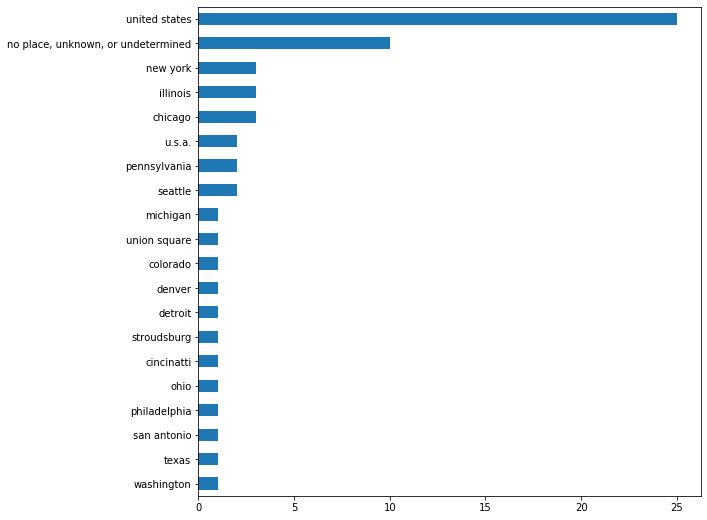

In [12]:
import pandas as pd
%matplotlib inline
from collections import Counter
location_counter = Counter()
wwi_sheet_music = requests.get("https://www.loc.gov/collections/world-war-i-sheet-music/?fo=json").json()

for item in wwi_sheet_music["results"]:
    if item['location'] is not None: #check that the item has a location, since it is optional
        for location in item['location']:
            location_counter[location] += 1 #add one for the location
    
locations = pd.Series(location_counter)
locations.sort_values(ascending=True).plot(kind='barh', figsize=(9,9))

## Further Research
Check out the "ask a librarian" section of our website: https://www.loc.gov/rr/askalib/